In [39]:
import os
import math
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import torch
#print("Using torch", torch.__version__)
torch.manual_seed(42)

<ipython-input-39-51e7ee873e08>:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


Задание 1: Создайте два вещественных тензора: a размером (5, 4) и b размером (12,)

In [40]:
a=torch.Tensor(5,4)
print(a)

b=torch.Tensor(12,)
print(b)

tensor([[ 1.2258e-38,  0.0000e+00,  9.4677e-41,  0.0000e+00],
        [ 3.3631e-44,  0.0000e+00,  1.1351e-43,  0.0000e+00],
        [-2.9143e-13,  3.2287e-41, -3.9650e-13,  3.2287e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
tensor([ 0.0000e+00,  0.0000e+00, -1.9502e-13,  3.2287e-41, -1.8435e-14,
         3.2287e-41,  5.4380e-01,  4.3833e-41,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00])


Задание 2:
2. Создайте тензор c, являющийся тензором b, но размера (2, 2, 3)


In [41]:
c=b.view(2,2,3)
print(c)

tensor([[[ 0.0000e+00,  0.0000e+00, -1.9502e-13],
         [ 3.2287e-41, -1.8435e-14,  3.2287e-41]],

        [[ 5.4380e-01,  4.3833e-41,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]])


Задание 3: 3. Выведите второй столбец матрицы a с помощью индексации

In [42]:
print(a[:, 1])

tensor([0.0000e+00, 0.0000e+00, 3.2287e-41, 0.0000e+00, 0.0000e+00])


Задание 4: 4. Создайте два вещественных тензора: a размером (6, 2) и b размером (1,12)
Задание 5: Создайте тензор c, являющийся тензором b, но размера (6, 2), произведите все арифметические операции с тензорами a и c

In [43]:
a=torch.FloatTensor(6,2)
b=torch.FloatTensor(1,12)
c=b.view(6,2)
print('A',a)
print('C',c)
x1=torch.add(a,c)
x2=torch.sub(a,c)
x3=torch.mul(a,c)
x4=torch.div(a,c)
x5=torch.remainder(a,c)
x6=torch.pow(a,c)
print(x1)
print(x2)
print(x3)
print(x4)

A tensor([[2.6765e-11, 4.3834e-41],
        [2.6765e-11, 4.3834e-41],
        [4.4842e-44, 0.0000e+00],
        [1.1210e-43, 0.0000e+00],
        [1.5418e-32, 3.2292e-41],
        [1.8623e-42, 0.0000e+00]])
C tensor([[-2.1205e-13,  3.2287e-41],
        [-1.1975e-13,  3.2287e-41],
        [ 1.1210e-43,  0.0000e+00],
        [ 8.9683e-44,  0.0000e+00],
        [-1.3101e-19,  7.0065e-45],
        [ 0.0000e+00,  1.1755e-38]])
tensor([[ 2.6553e-11,  7.6121e-41],
        [ 2.6645e-11,  7.6121e-41],
        [ 1.5695e-43,  0.0000e+00],
        [ 2.0179e-43,  0.0000e+00],
        [-1.3101e-19,  3.2299e-41],
        [ 1.8623e-42,  1.1755e-38]])
tensor([[ 2.6977e-11,  1.1547e-41],
        [ 2.6885e-11,  1.1547e-41],
        [-6.7262e-44,  0.0000e+00],
        [ 2.2421e-44,  0.0000e+00],
        [ 1.3101e-19,  3.2285e-41],
        [ 1.8623e-42, -1.1755e-38]])
tensor([[-5.6755e-24,  0.0000e+00],
        [-3.2051e-24,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+0

Поддержка GPU

In [44]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Is the GPU available? False
Device cpu


Модель

Простой классификатор

In [45]:
import torch.nn as nn
import torch.nn.functional as F


In [46]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_outputs)
        self.act_fn = nn.Tanh()


    def forward(self, x):


        x = self.linear1(x)
        x = self.act_fn(x)

        return x

model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)


SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=1, bias=True)
  (act_fn): Tanh()
)


Данные

In [47]:
import torch.utils.data as data

class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()
    def generate_continuous_xor(self):
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        data += self.std * torch.randn(data.shape)
        self.data = data
        self.label = label
    def __len__(self):
        return self.size
    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Визуализация

In [48]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()


Тестируем

Size of dataset: 200
Data point 0: (tensor([-0.0408,  0.0962]), tensor(0))


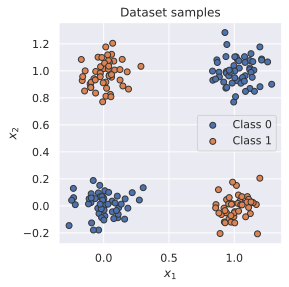

In [49]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])
visualize_samples(dataset.data, dataset.label)
plt.show()

Функция ошибки

In [50]:
loss_module = nn.BCEWithLogitsLoss()

Оптимизатор

In [51]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


Обучение

Обучающая функция

In [52]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    model.train()
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            loss = loss_module(preds, data_labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

Тренируем модель

In [53]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
model.to(device)
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

Сохранение модели

In [54]:
state_dict = model.state_dict()
torch.save(state_dict, "our_model.pth")

state_dict = torch.load("our_model.pth")

new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

<ipython-input-54-d31b66878489>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("our_model.pth")


<All keys matched successfully>

Оценка качества

Функция оценки

In [55]:
def eval_model(model, data_loader):
    model.eval()
    true_preds, num_preds = 0., 0.
    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_labels = (preds >= 0.5).long()
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

Проверяем на тестовом наборе

In [56]:
test_dataset = XORDataset(size=500)
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)
eval_model(model, test_data_loader)

Accuracy of the model: 75.60%


Визуализация

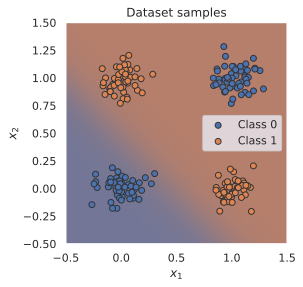

In [57]:
@torch.no_grad()
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]
    output_image = output_image.cpu().numpy()
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig
_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()